In [91]:
!pip install umap-learn

^C


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly import express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

# Загружаем данные

1. Age (numeric)
2. 
Sex (text: male, female
3. 
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skille
4. )
Housing (text: own, rent, or fr
5. e)
Saving accounts (text - little, moderate, quite rich, r
6. ch)
Checking account (numeric, in DM - Deutsch 
7. ark)
Credit amount (numeric, 
8. n DM)
Duration (numeric, in
9. month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)/others)/others)/others)

In [5]:
data = pd.read_csv('german_credit_data.csv', index_col=0)
data.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

# EDA

In [6]:
data.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [8]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

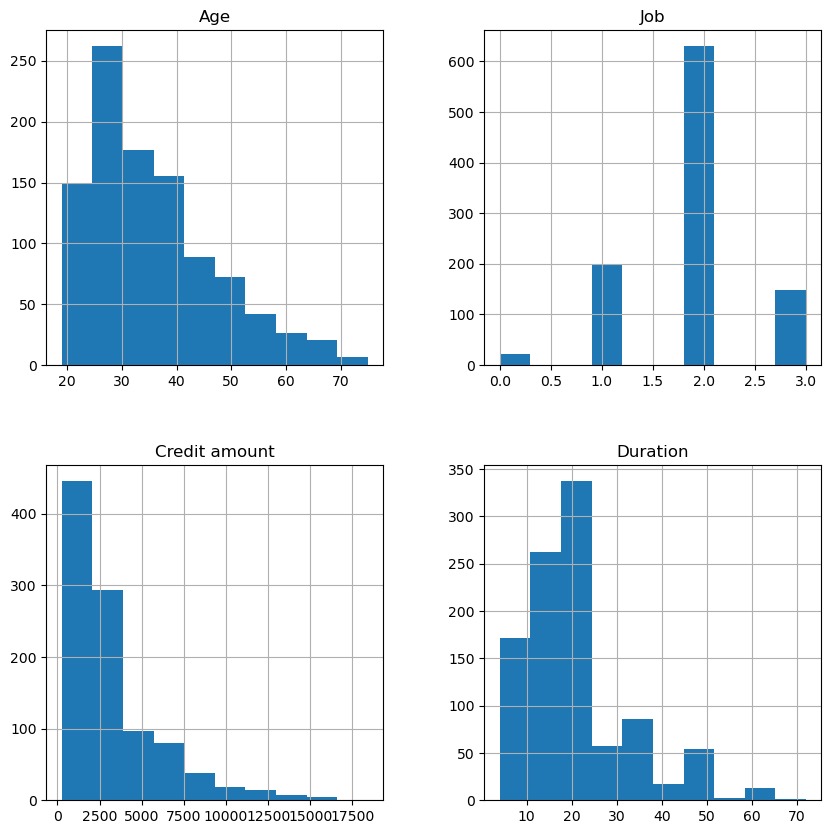

In [11]:
data.hist(figsize = (10,10))
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

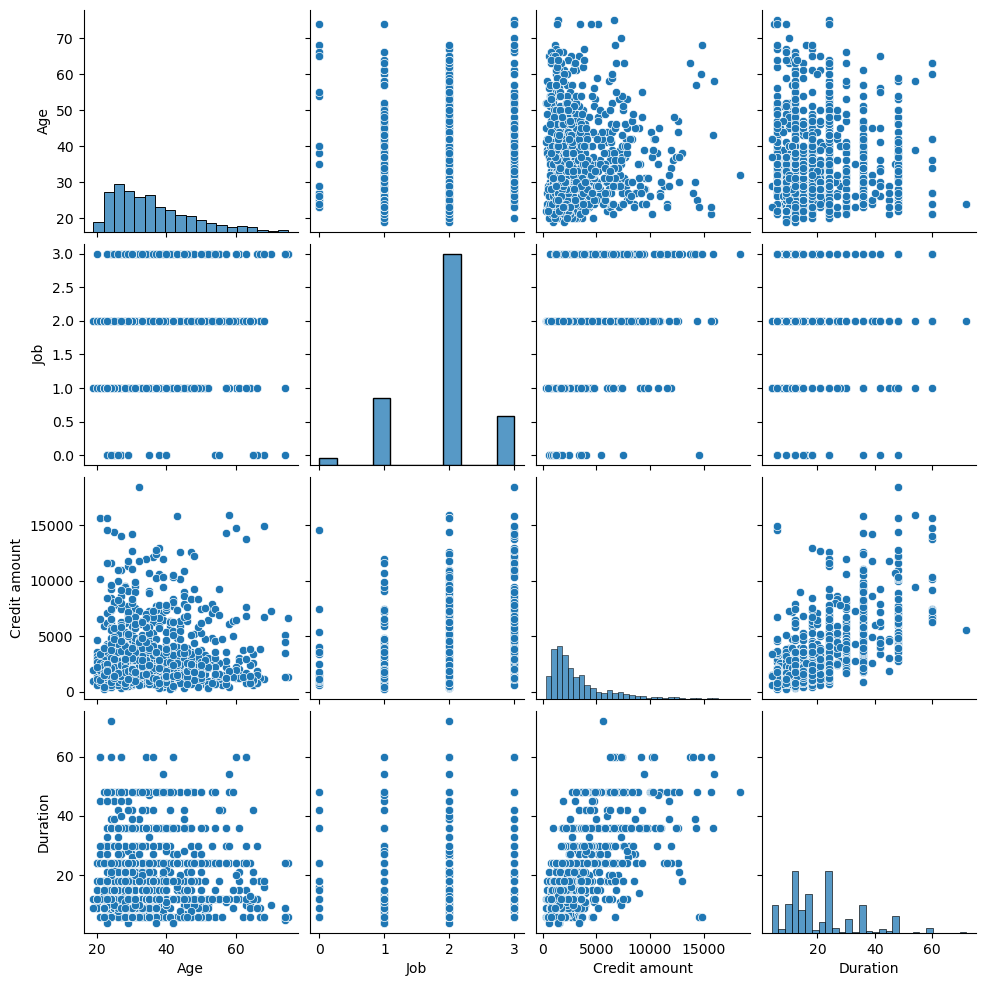

In [23]:
sns.pairplot(data)

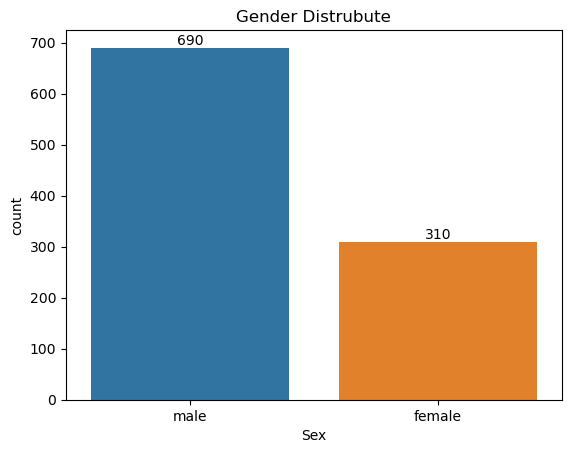

In [13]:
sns.countplot(x='Sex', data=data)
plt.title('Gender Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')
plt.show()

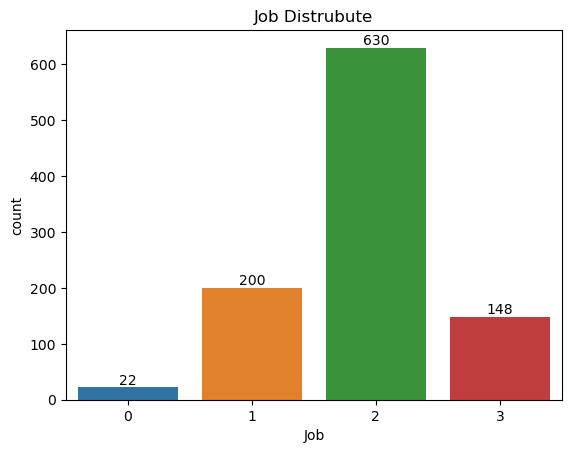

In [15]:
sns.countplot(x='Job', data=data)
plt.title('Job Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

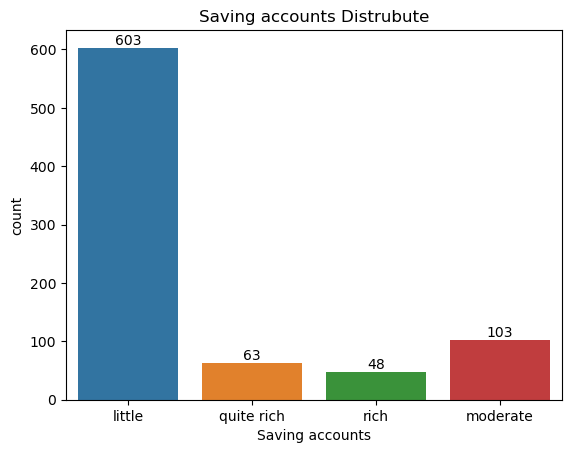

In [16]:
sns.countplot(x='Saving accounts', data=data)
plt.title('Saving accounts Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

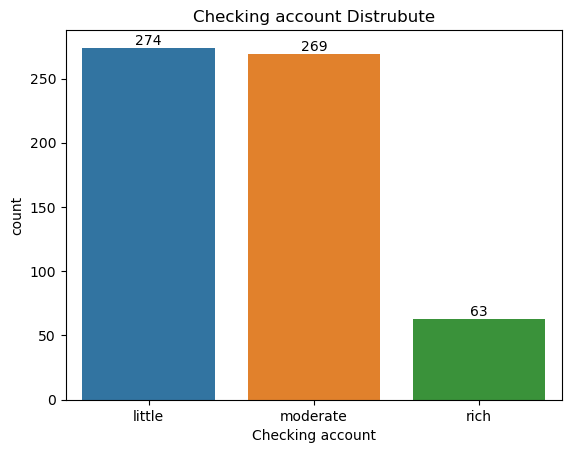

In [18]:
sns.countplot(x='Checking account', data=data)
plt.title('Checking account Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

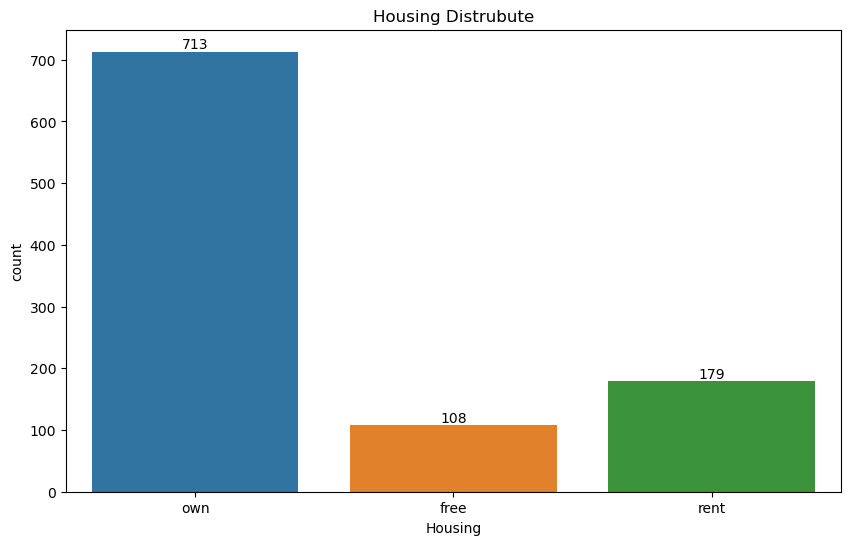

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Housing', data=data)
plt.title('Housing Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')
plt.show()

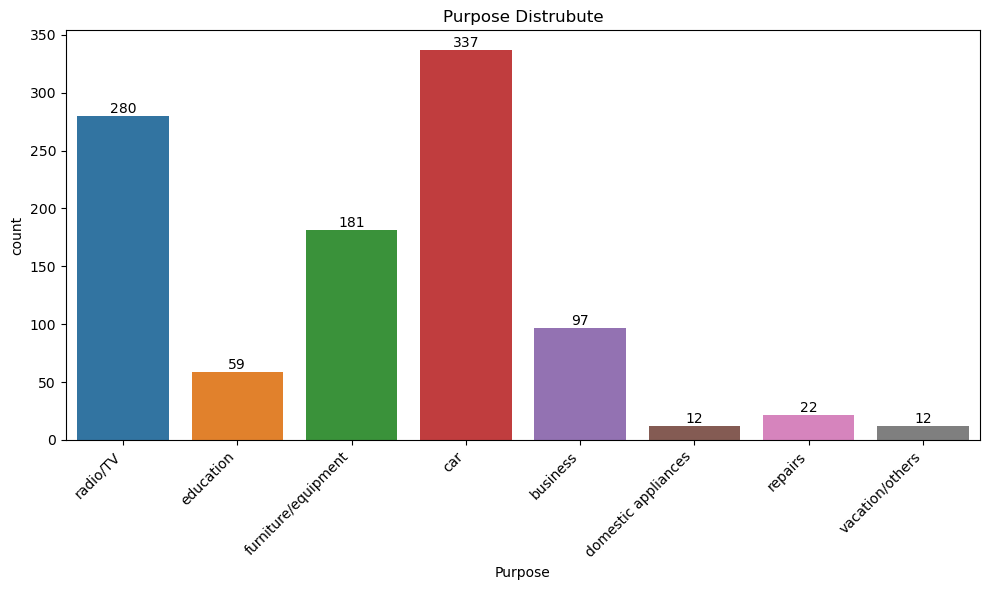

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=data)
plt.title('Purpose Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Подготовка данных

In [25]:
data['Saving accounts'].mode()[0]

'little'

In [26]:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)

In [22]:
data['Checking account'].mode()

0    little
Name: Checking account, dtype: object

In [24]:
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True)

In [27]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [31]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [32]:
data.head()

Age  Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    1    2     own          little           little           1169   
1   22    0    2     own          little         moderate           5951   
2   49    1    1     own          little           little           2096   
3   45    1    2    free          little           little           7882   
4   53    1    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

In [48]:
data_dum = pd.get_dummies(data, columns = ['Housing', 'Purpose'])
data_dum.head()

Age  Sex  Job Saving accounts Checking account  Credit amount  Duration  \
0   67    1    2          little           little           1169         6   
1   22    0    2          little         moderate           5951        48   
2   49    1    1          little           little           2096        12   
3   45    1    2          little           little           7882        42   
4   53    1    2          little           little           4870        24   

   Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
0         False         True         False             False        False   
1         False         True         False             False        False   
2         False         True         False             False        False   
3          True        False         False             False        False   
4          True        False         False             False         True   

   Purpose_domestic appliances  Purpose_education  \
0                        False              False   
1                        False              False   
2                        False               True   
3                        False              False   
4                        False              False   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                        False              True            False   
1                        False              True            False   
2                        False             False            False   
3                         True             False            False   
4                        False             False            False   

   Purpose_vacation/others  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False

In [49]:
data_dum.dtypes

Age                             int64
Sex                             int32
Job                             int64
Saving accounts                object
Checking account               object
Credit amount                   int64
Duration                        int64
Housing_free                     bool
Housing_own                      bool
Housing_rent                     bool
Purpose_business                 bool
Purpose_car                      bool
Purpose_domestic appliances      bool
Purpose_education                bool
Purpose_furniture/equipment      bool
Purpose_radio/TV                 bool
Purpose_repairs                  bool
Purpose_vacation/others          bool
dtype: object

In [50]:
le = LabelEncoder()
le.fit(['little', 'moderate', 'quite rich', 'rich'])
le.classes_ = np.array(['little', 'moderate', 'quite rich', 'rich'])
print(list(le.classes_))

['little', 'moderate', 'quite rich', 'rich']


In [51]:
data_dum['Saving accounts'] = le.transform(data_dum['Saving accounts'])

In [52]:
data_dum['Checking account'] = le.transform(data_dum['Checking account'])

In [53]:
data_dum.head()

Age  Sex  Job  Saving accounts  Checking account  Credit amount  Duration  \
0   67    1    2                0                 0           1169         6   
1   22    0    2                0                 1           5951        48   
2   49    1    1                0                 0           2096        12   
3   45    1    2                0                 0           7882        42   
4   53    1    2                0                 0           4870        24   

   Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
0         False         True         False             False        False   
1         False         True         False             False        False   
2         False         True         False             False        False   
3          True        False         False             False        False   
4          True        False         False             False         True   

   Purpose_domestic appliances  Purpose_education  \
0                        False              False   
1                        False              False   
2                        False               True   
3                        False              False   
4                        False              False   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                        False              True            False   
1                        False              True            False   
2                        False             False            False   
3                         True             False            False   
4                        False             False            False   

   Purpose_vacation/others  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False

In [54]:
data_dum = data_dum.astype(np.int64)
data_dum.head()

Age  Sex  Job  Saving accounts  Checking account  Credit amount  Duration  \
0   67    1    2                0                 0           1169         6   
1   22    0    2                0                 1           5951        48   
2   49    1    1                0                 0           2096        12   
3   45    1    2                0                 0           7882        42   
4   53    1    2                0                 0           4870        24   

   Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
0             0            1             0                 0            0   
1             0            1             0                 0            0   
2             0            1             0                 0            0   
3             1            0             0                 0            0   
4             1            0             0                 0            1   

   Purpose_domestic appliances  Purpose_education  \
0                            0                  0   
1                            0                  0   
2                            0                  1   
3                            0                  0   
4                            0                  0   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                            0                 1                0   
1                            0                 1                0   
2                            0                 0                0   
3                            1                 0                0   
4                            0                 0                0   

   Purpose_vacation/others  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

## Шкалируем данные

Это необходимо, поскольку при кластеризации вычисляются расстояния между точками, фичи с большими значениями не должны вносить больший вклад

In [59]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_dum)
data_scaled = pd.DataFrame(X_scaled, columns=data_dum.columns)

In [60]:
data_scaled.head()

Age  Sex       Job  Saving accounts  Checking account  Credit amount  \
0  0.857143  1.0  0.666667              0.0          0.000000       0.050567   
1  0.053571  0.0  0.666667              0.0          0.333333       0.313690   
2  0.535714  1.0  0.333333              0.0          0.000000       0.101574   
3  0.464286  1.0  0.666667              0.0          0.000000       0.419941   
4  0.607143  1.0  0.666667              0.0          0.000000       0.254209   

   Duration  Housing_free  Housing_own  Housing_rent  Purpose_business  \
0  0.029412           0.0          1.0           0.0               0.0   
1  0.647059           0.0          1.0           0.0               0.0   
2  0.117647           0.0          1.0           0.0               0.0   
3  0.558824           1.0          0.0           0.0               0.0   
4  0.294118           1.0          0.0           0.0               0.0   

   Purpose_car  Purpose_domestic appliances  Purpose_education  \
0          0.0                          0.0                0.0   
1          0.0                          0.0                0.0   
2          0.0                          0.0                1.0   
3          0.0                          0.0                0.0   
4          1.0                          0.0                0.0   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                          0.0               1.0              0.0   
1                          0.0               1.0              0.0   
2                          0.0               0.0              0.0   
3                          1.0               0.0              0.0   
4                          0.0               0.0              0.0   

   Purpose_vacation/others  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

## Визуализируем данные

In [78]:
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)

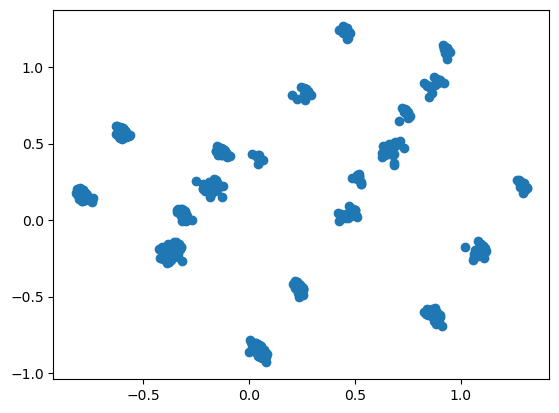

In [79]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

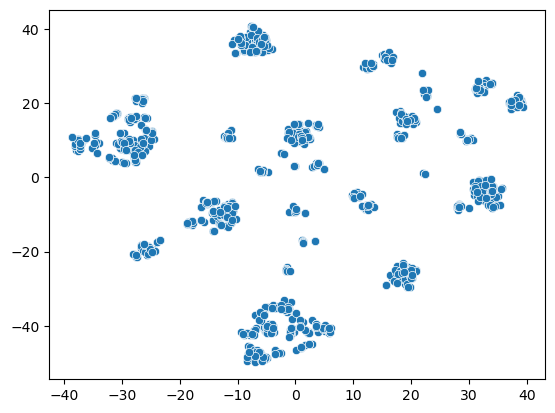

In [71]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

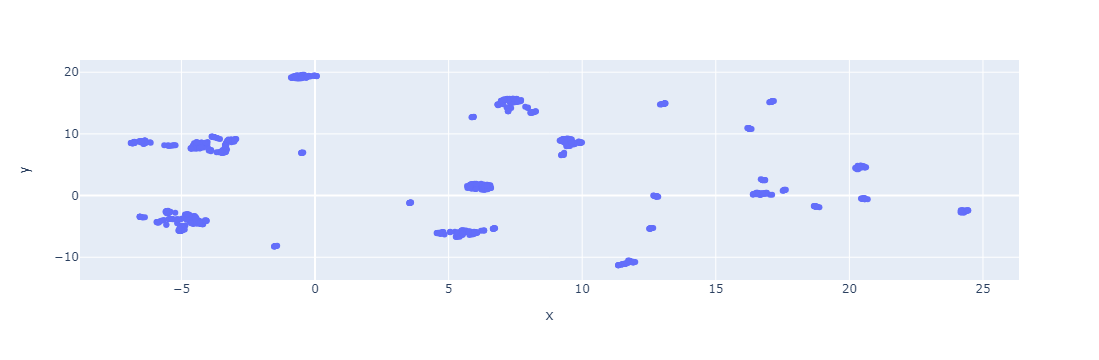

In [94]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_scaled)
embedding.shape
px.scatter(
    x=embedding[:, 0],
    y=embedding[:, 1]
)

визуально наблюдаем, что кластеров довольно много

# Моделирование

## K-means

In [80]:
inertia = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

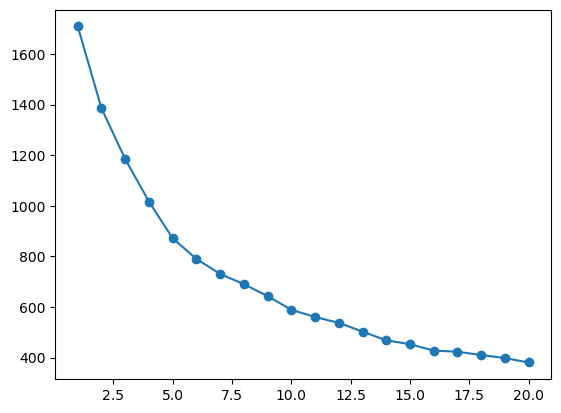

In [81]:
plt.plot(range(1,21), inertia, marker='o');

In [82]:
D = []
for i in range(1,19):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

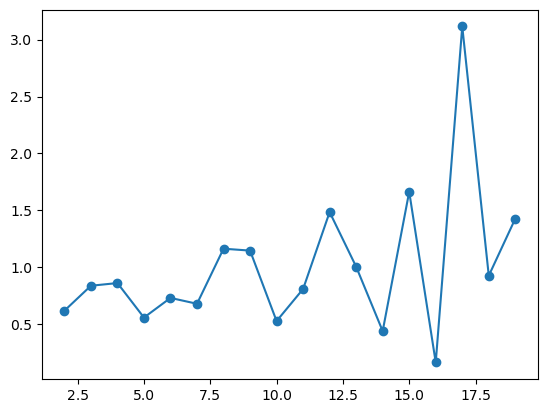

In [83]:
plt.plot(range(2,20), D, marker='o');

количество кластеров 16

In [95]:
kmeans = KMeans(n_clusters=16, random_state=10, n_init=10).fit(X_scaled)
labels = kmeans.labels_

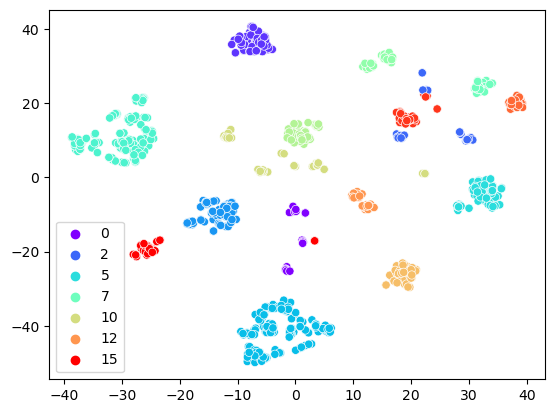

In [96]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

## AgglomerativeClustering

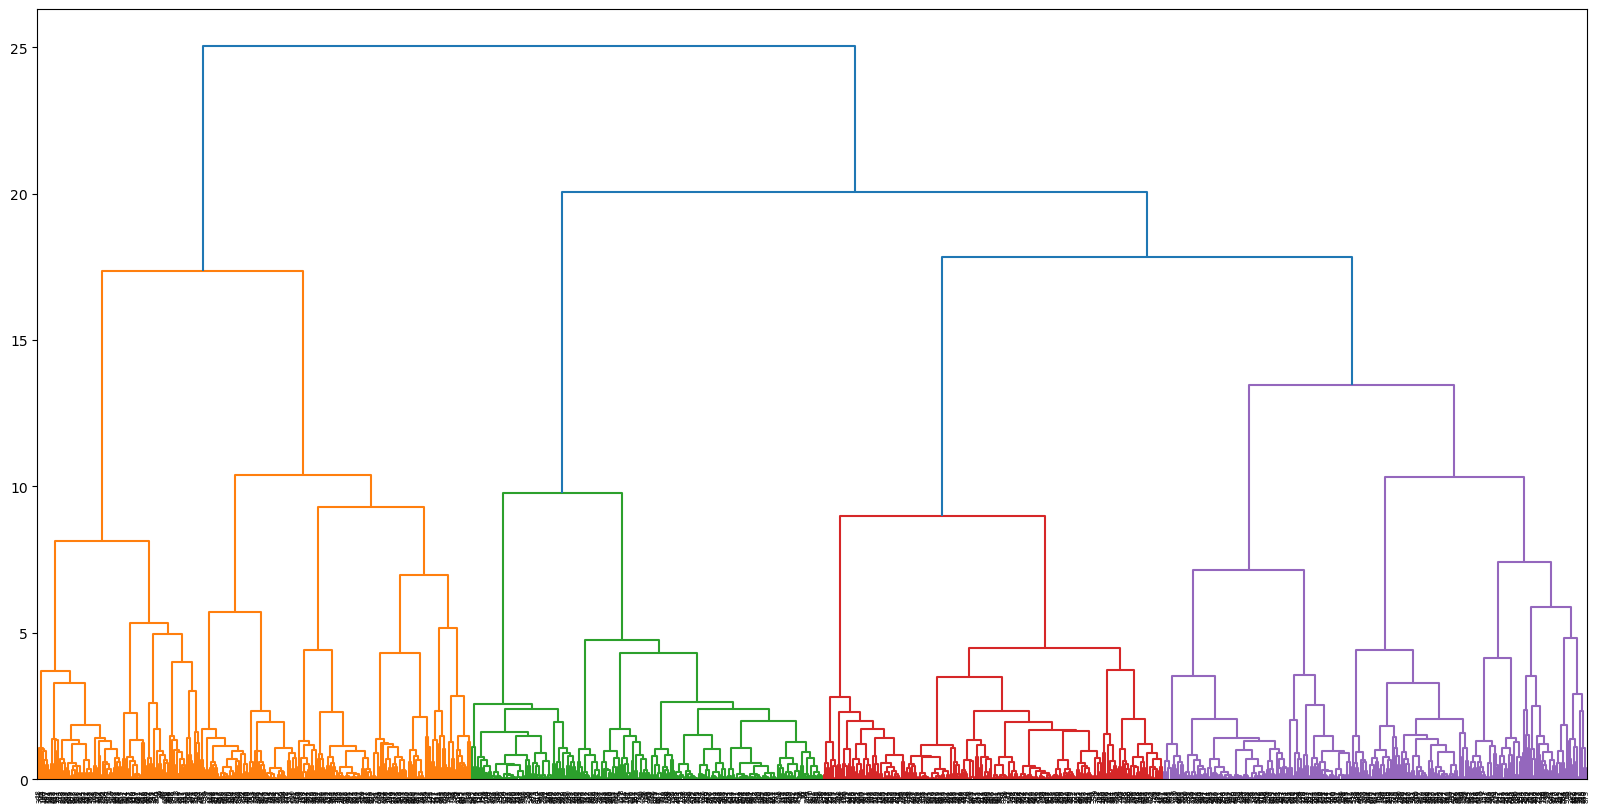

In [101]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

судя по дендрограмме, можно выделить 5 кластеров

In [100]:
silhouette = []
for i in tqdm(range(2,21)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.59it/s]


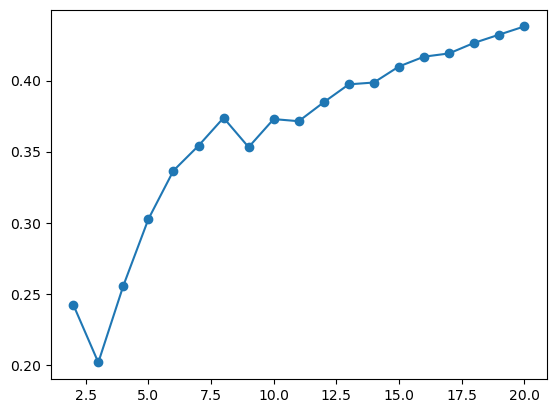

In [104]:
plt.plot(range(2,21), silhouette, marker='o');

по силуэтному коэффициенту определить количество кластеров сложно

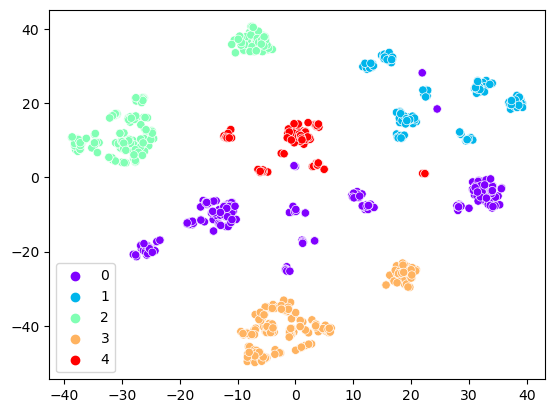

In [108]:
agg = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
labels = agg.labels_
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

## DBSCAN

In [105]:
dbscan = DBSCAN().fit(X_scaled)
labels = dbscan.labels_

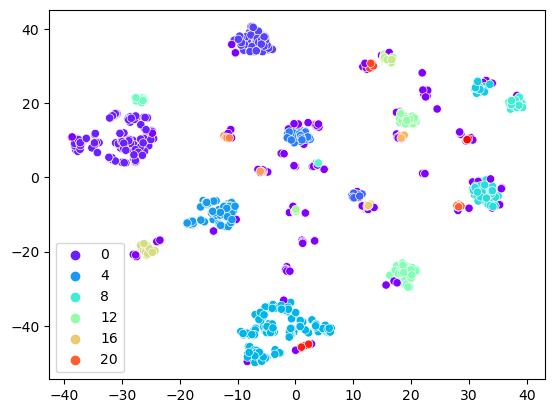

In [107]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [109]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:12<00:00,  7.45it/s]


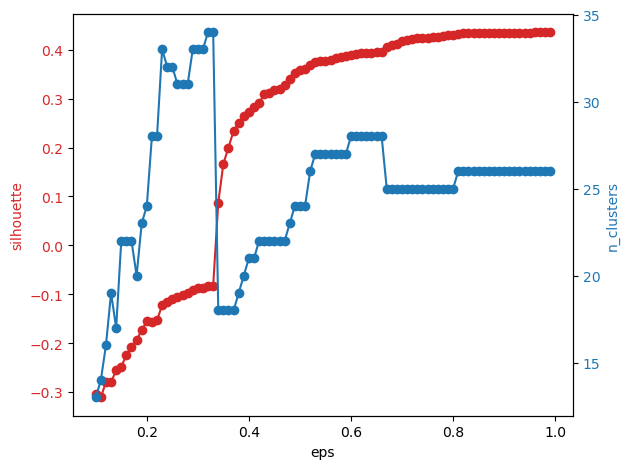

In [110]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

по силуэтному коэффициенту не понять, какое следует выбрать eps

## Интерпретация

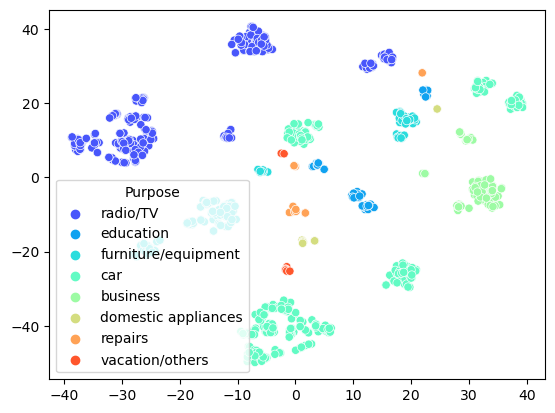

In [111]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=data['Purpose'], palette='rainbow');

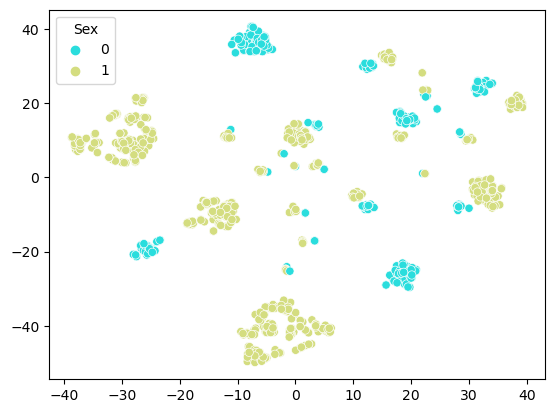

In [113]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=data['Sex'], palette='rainbow');

In [ ]:
похоже, данные поделились на кластеры в соответствии с целью кредита + пол.